In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("data.csv", skiprows=4)

In [3]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,NaN,NaN,NaN,NaN,NaN,NaN,...,72.492384,69.869186,67.363929,65.091053,62.857189,60.855917,59.087309,57.284727,NaN,NaN
2,Afghanistan,AFG,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,357.3,351.7,345.8,340.2,334.8,329.4,...,73.400000,70.200000,67.200000,64.600000,62.200000,59.900000,57.800000,55.700000,NaN,NaN
3,Africa Western and Central,AFW,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,NaN,NaN,NaN,NaN,NaN,NaN,...,111.432027,109.185389,106.891019,104.627006,102.014144,99.551960,96.928307,94.372235,NaN,NaN
4,Angola,AGO,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,NaN,NaN,NaN,NaN,NaN,NaN,...,92.900000,88.300000,84.400000,81.100000,78.000000,75.000000,72.100000,69.400000,NaN,NaN


In [4]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       'Unnamed: 67'],
      dtype='object')

In [5]:
data.shape

(266, 68)

In [6]:
null_percentage = (data.isnull().sum() / len(data)) * 100
print(null_percentage)

Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
1960               53.759398
                     ...    
2019                8.270677
2020                8.270677
2021                8.270677
2022              100.000000
Unnamed: 67       100.000000
Length: 68, dtype: float64


In [7]:
threshold = 0.9
total_rows = len(data)
threshold_count = total_rows * threshold

data_cleaned = data.dropna(axis=1, thresh=threshold_count)

In [8]:
data_cleaned.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,165.832562,164.161055,162.695217,161.379202,161.983963,156.580561,...,78.787727,75.44269,72.492384,69.869186,67.363929,65.091053,62.857189,60.855917,59.087309,57.284727
2,Afghanistan,AFG,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,178.500000,172.200000,166.300000,160.800000,155.500000,150.600000,...,80.300000,76.80000,73.400000,70.200000,67.200000,64.600000,62.200000,59.900000,57.800000,55.700000
3,Africa Western and Central,AFW,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,197.863117,196.252781,194.790096,193.237227,191.381599,189.017343,...,116.249469,113.66425,111.432027,109.185389,106.891019,104.627006,102.014144,99.551960,96.928307,94.372235
4,Angola,AGO,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,223.500000,223.500000,223.600000,223.700000,223.300000,222.400000,...,104.900000,98.30000,92.900000,88.300000,84.400000,81.100000,78.000000,75.000000,72.100000,69.400000


In [9]:
data_cleaned.shape

(266, 36)

In [10]:
data_cleaned.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [11]:
data_cleaned.fillna(data_cleaned.mean(), inplace=True)
data_filtered = data_cleaned

In [12]:
normalized_data = (data_cleaned.iloc[:, 4:] - data_cleaned.iloc[:, 4:].mean()) / data_cleaned.iloc[:, 4:].std()

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)  
cluster_labels = kmeans.fit_predict(normalized_data)

In [14]:
cluster_labels

array([1, 0, 0, 3, 3, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 0, 3, 4, 2,
       2, 2, 2, 2, 2, 1, 4, 1, 2, 2, 4, 4, 3, 2, 2, 2, 1, 2, 1, 0, 0, 3,
       4, 2, 4, 1, 2, 1, 2, 1, 1, 2, 2, 2, 4, 1, 2, 1, 1, 1, 4, 1, 1, 2,
       1, 1, 2, 4, 2, 2, 0, 2, 0, 2, 1, 2, 1, 1, 4, 2, 1, 4, 1, 3, 0, 3,
       0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 2, 1, 4, 0, 0, 1, 0, 1, 4,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 4, 1, 4, 4, 2, 2, 2, 1, 4, 2, 3,
       2, 2, 1, 0, 0, 1, 2, 4, 4, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1,
       1, 1, 4, 2, 3, 2, 4, 1, 2, 1, 1, 3, 4, 2, 0, 2, 2, 4, 1, 3, 3, 1,
       2, 2, 4, 1, 2, 2, 2, 4, 0, 2, 1, 1, 1, 4, 2, 0, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 2, 2, 0, 4, 2, 4, 4, 2, 1, 3, 1, 2, 3, 2, 0, 3, 0, 4, 1,
       1, 2, 2, 2, 4, 1, 2, 1, 2, 3, 1, 1, 0, 2, 4, 4, 1, 0, 1, 2, 4, 0,
       1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 4, 2, 1, 4, 4,
       0, 4])

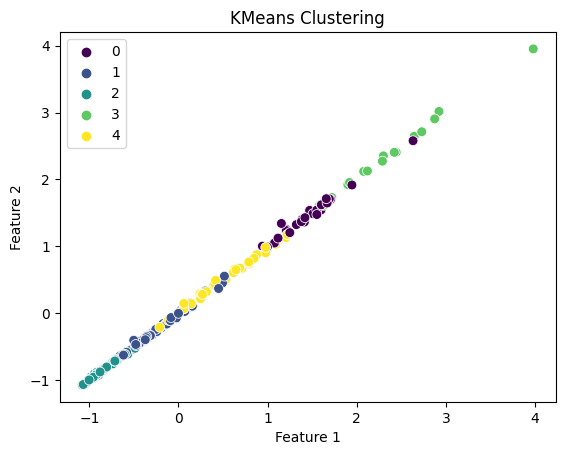

In [15]:
sns.scatterplot(x=normalized_data.iloc[:, 0], y=normalized_data.iloc[:, 1], hue=cluster_labels, palette='viridis', s=50)
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.savefig('k_means_clustering.png')
plt.show()

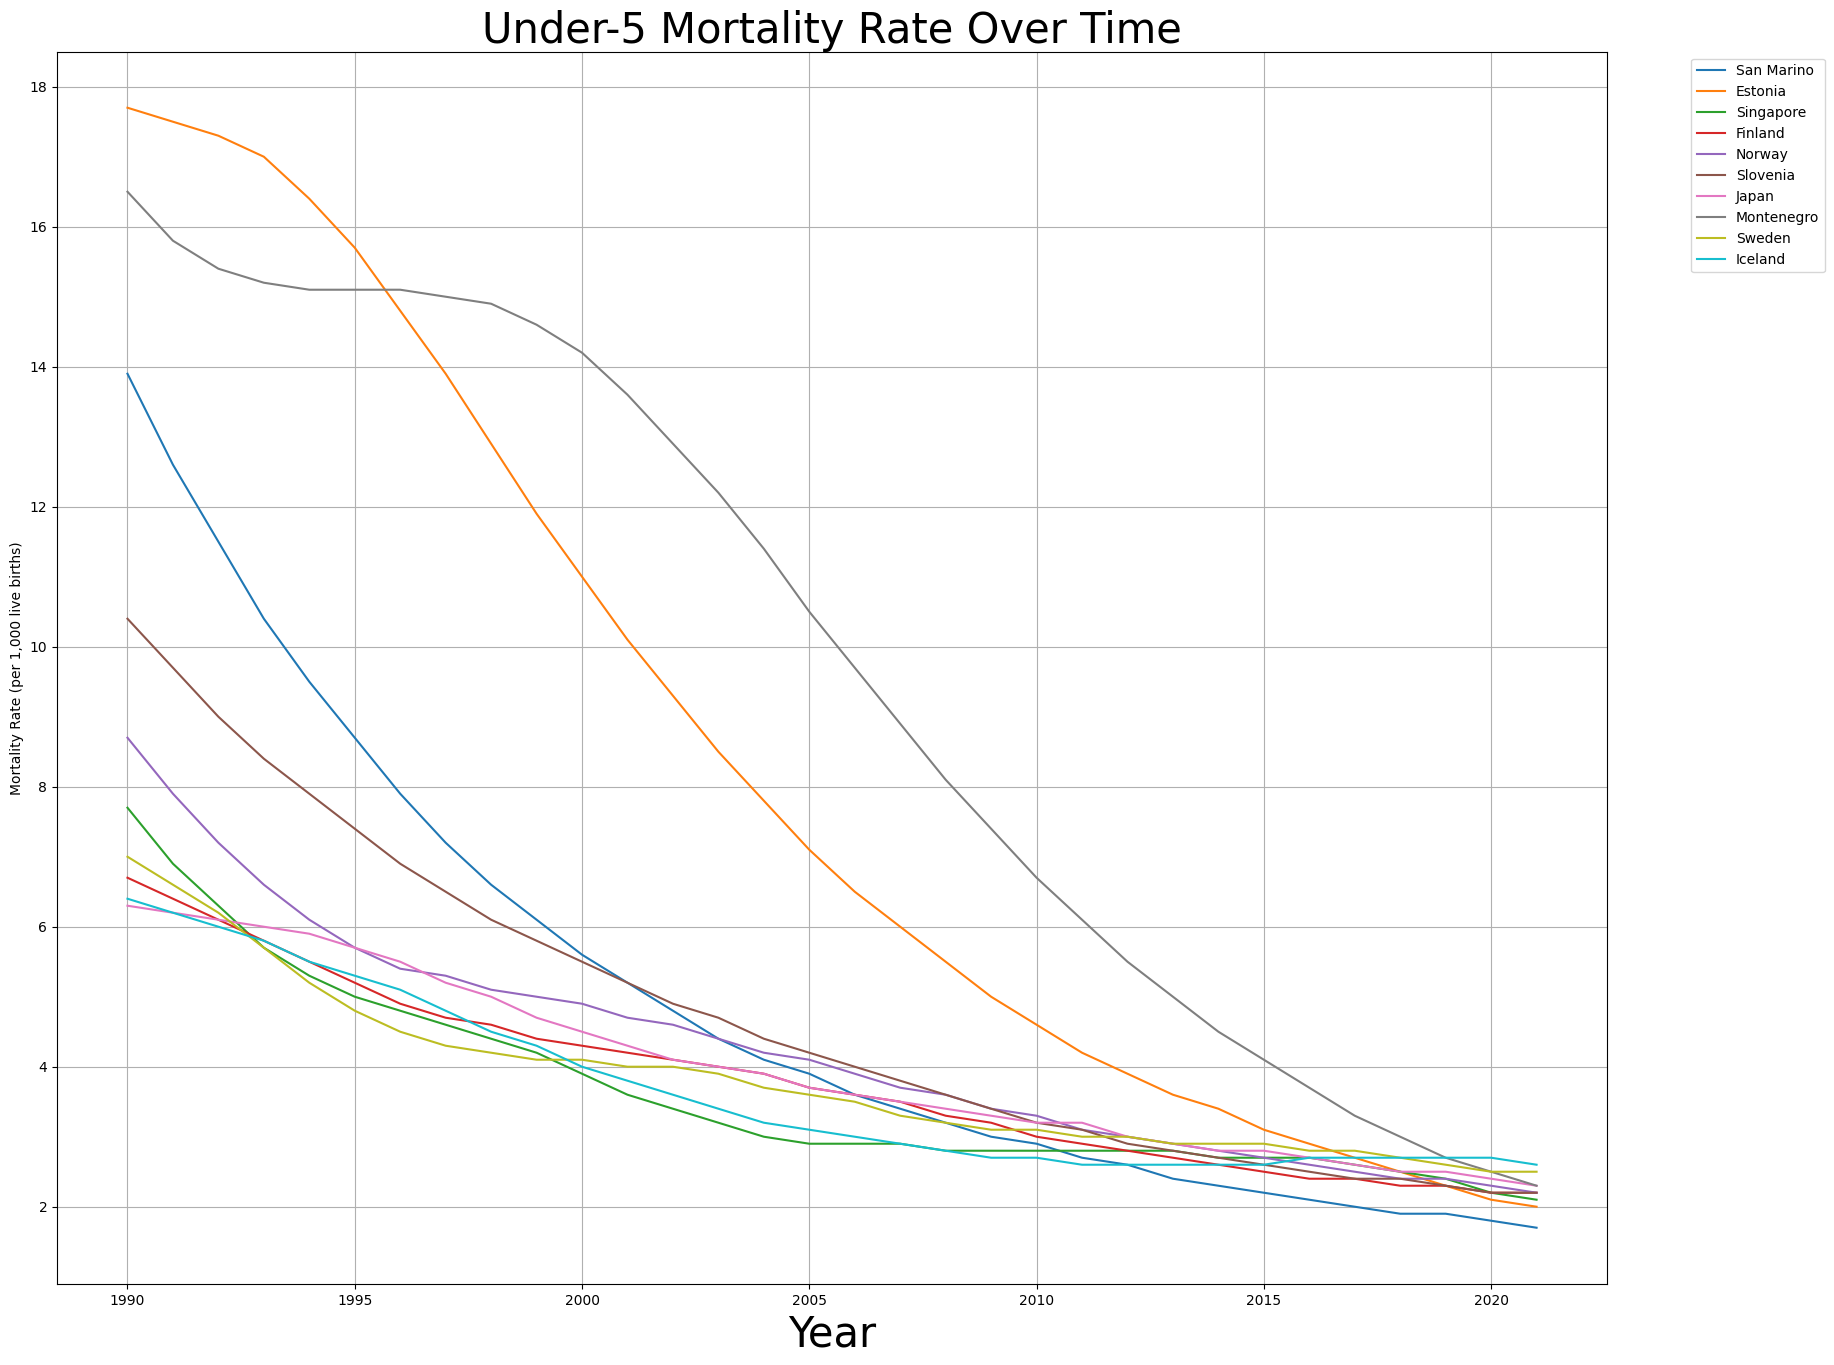

In [16]:
df_filtered = data_filtered.dropna(subset=['1990', '1991', '1992', '1993', '1994', '1995', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'], how='all')

least_10_countries = df_filtered.nsmallest(10, '2021')

plt.figure(figsize=(20, 16))

for index, row in least_10_countries.iterrows():
    years = np.array([int(col) for col in data_filtered.columns[4:]])
    mortality_rate = row[4:].values.astype(float)
    plt.plot(years, mortality_rate, label=row['Country Name'])

plt.title('Under-5 Mortality Rate Over Time', fontsize=30)
plt.xlabel('Year', fontsize=30)
plt.ylabel('Mortality Rate (per 1,000 live births)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.savefig("Mortality_rate.png")
plt.show()

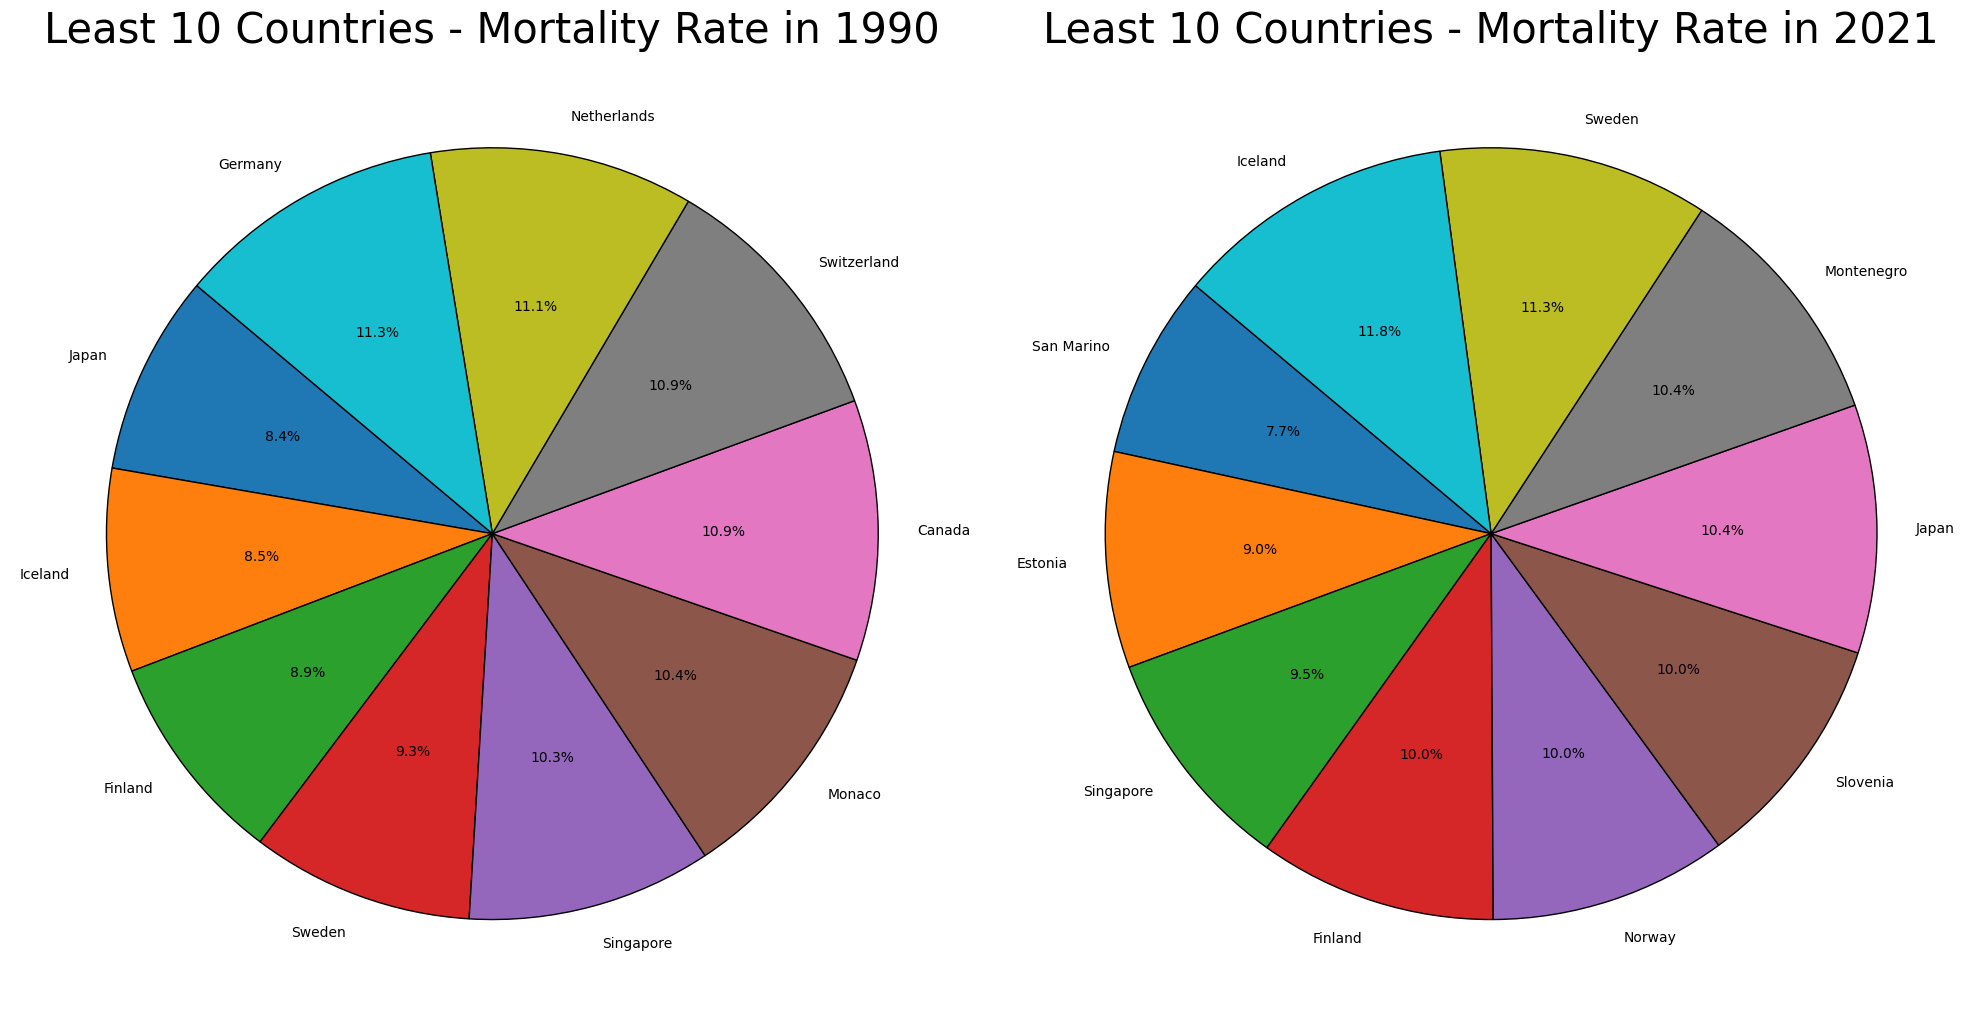

In [17]:
least_10_countries_1990 = df_filtered.nsmallest(10, '1990')
least_10_countries_2021 = df_filtered.nsmallest(10, '2021')

plt.figure(figsize=(20, 14))

plt.subplot(1, 2, 1)
plt.pie(least_10_countries_1990['1990'], labels=least_10_countries_1990['Country Name'], autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='black'))
plt.title('Least 10 Countries - Mortality Rate in 1990', fontsize=30)

plt.subplot(1, 2, 2)
plt.pie(least_10_countries_2021['2021'], labels=least_10_countries_2021['Country Name'], autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='black'))
plt.title('Least 10 Countries - Mortality Rate in 2021', fontsize=30)

plt.tight_layout()
plt.savefig("pie_chart.png")
plt.show()

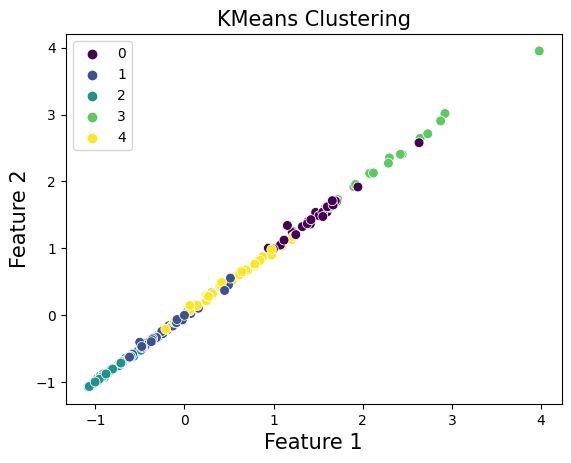

In [18]:
sns.scatterplot(x=normalized_data.iloc[:, 0], y=normalized_data.iloc[:, 1], hue=cluster_labels, palette='viridis', s=50)


plt.title('KMeans Clustering', fontsize=15)
plt.xlabel('Feature 1', fontsize=15)
plt.ylabel('Feature 2', fontsize=15)

plt.savefig('k_means_clustering.png')

plt.show()

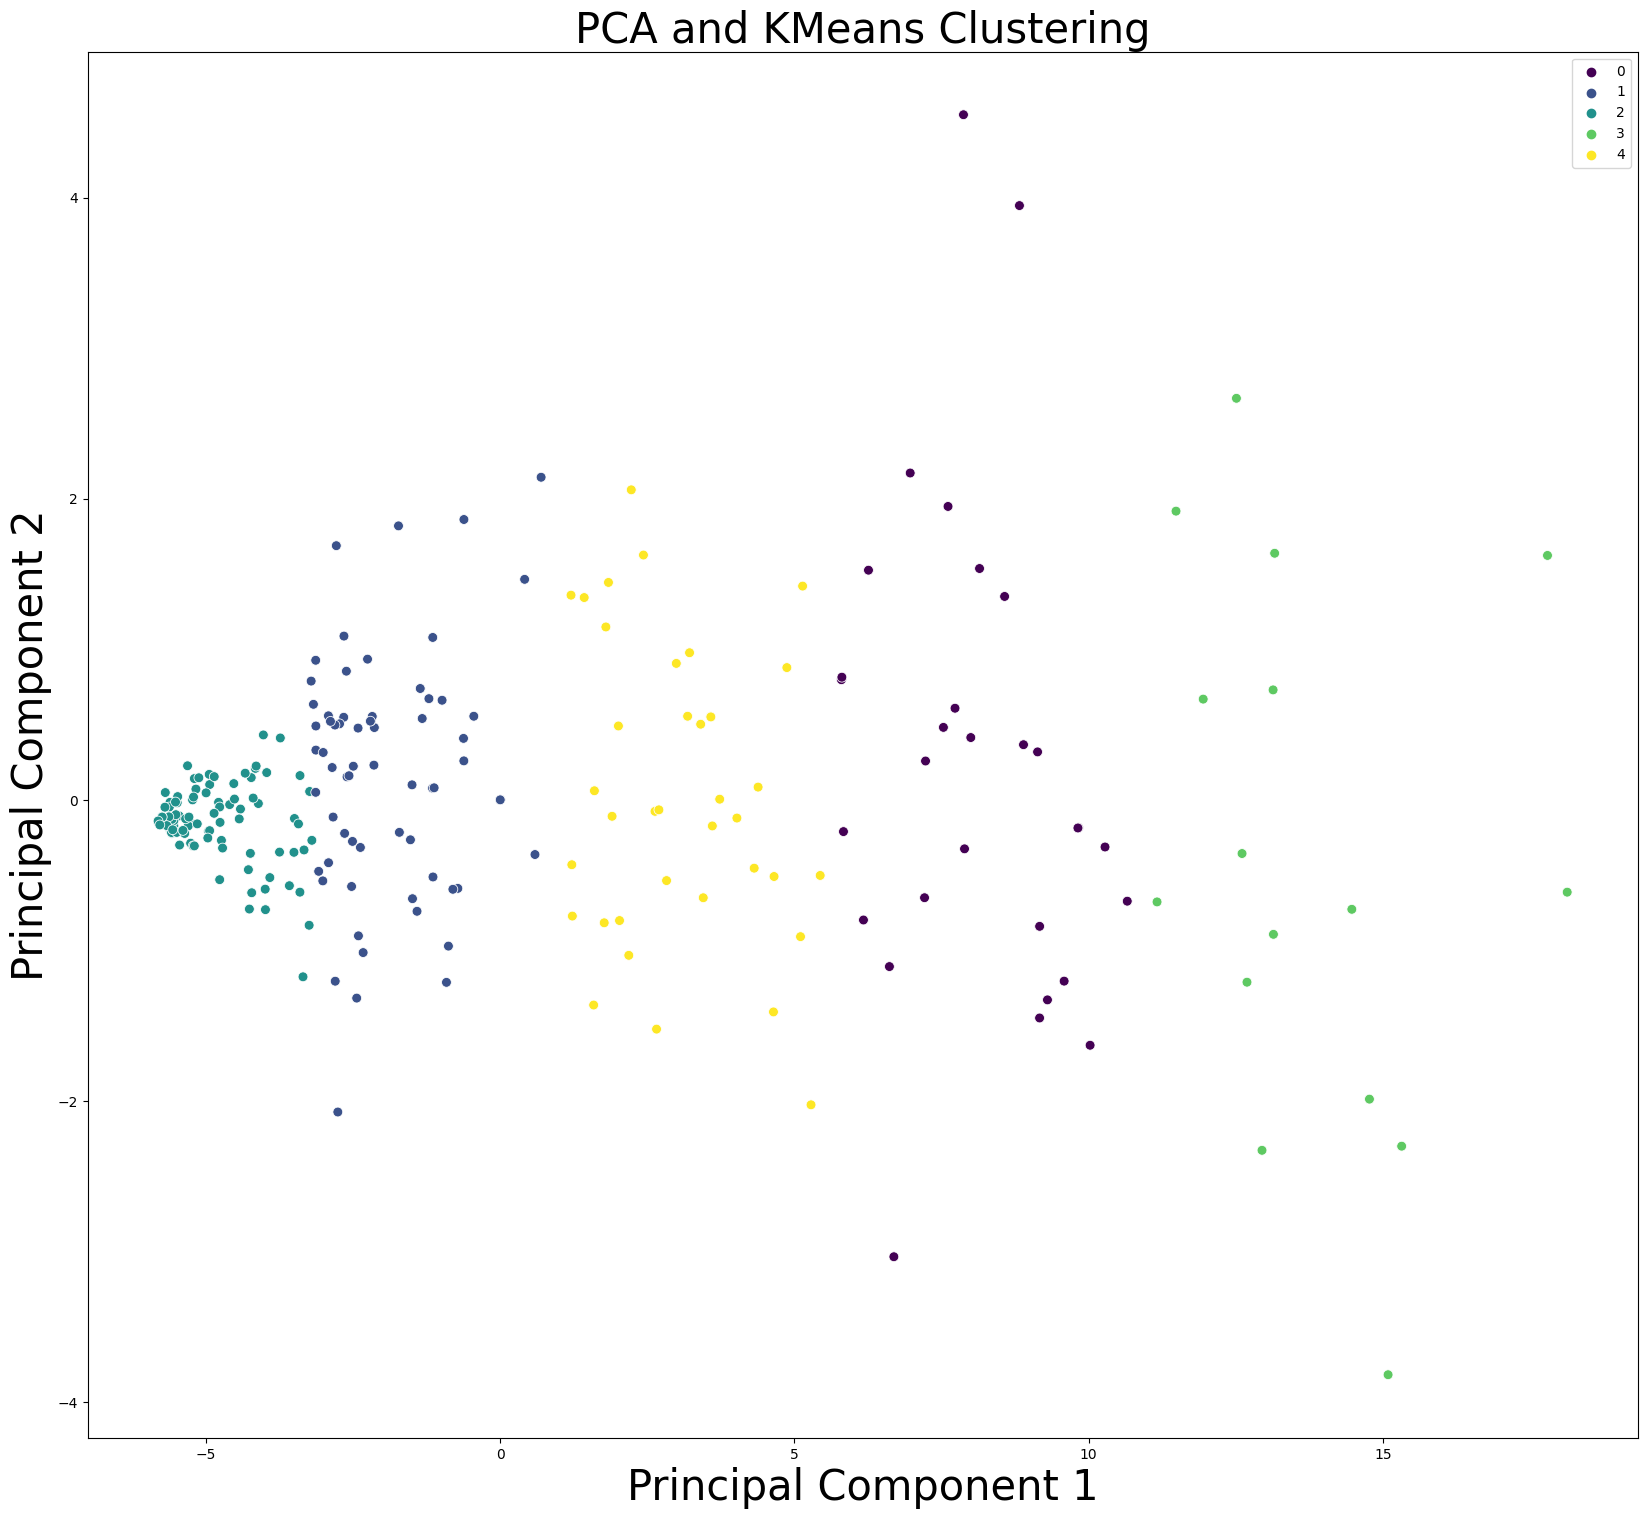

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(normalized_data)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pc_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

plt.figure(figsize=(20, 18))
sns.scatterplot(x=pc_df['Principal Component 1'], y=pc_df['Principal Component 2'], hue=cluster_labels, palette='viridis', s=50)
plt.title('PCA and KMeans Clustering', fontsize=30)
plt.xlabel('Principal Component 1', fontsize=30)
plt.ylabel('Principal Component 2', fontsize=30)
plt.savefig("PCA.png")
plt.show()

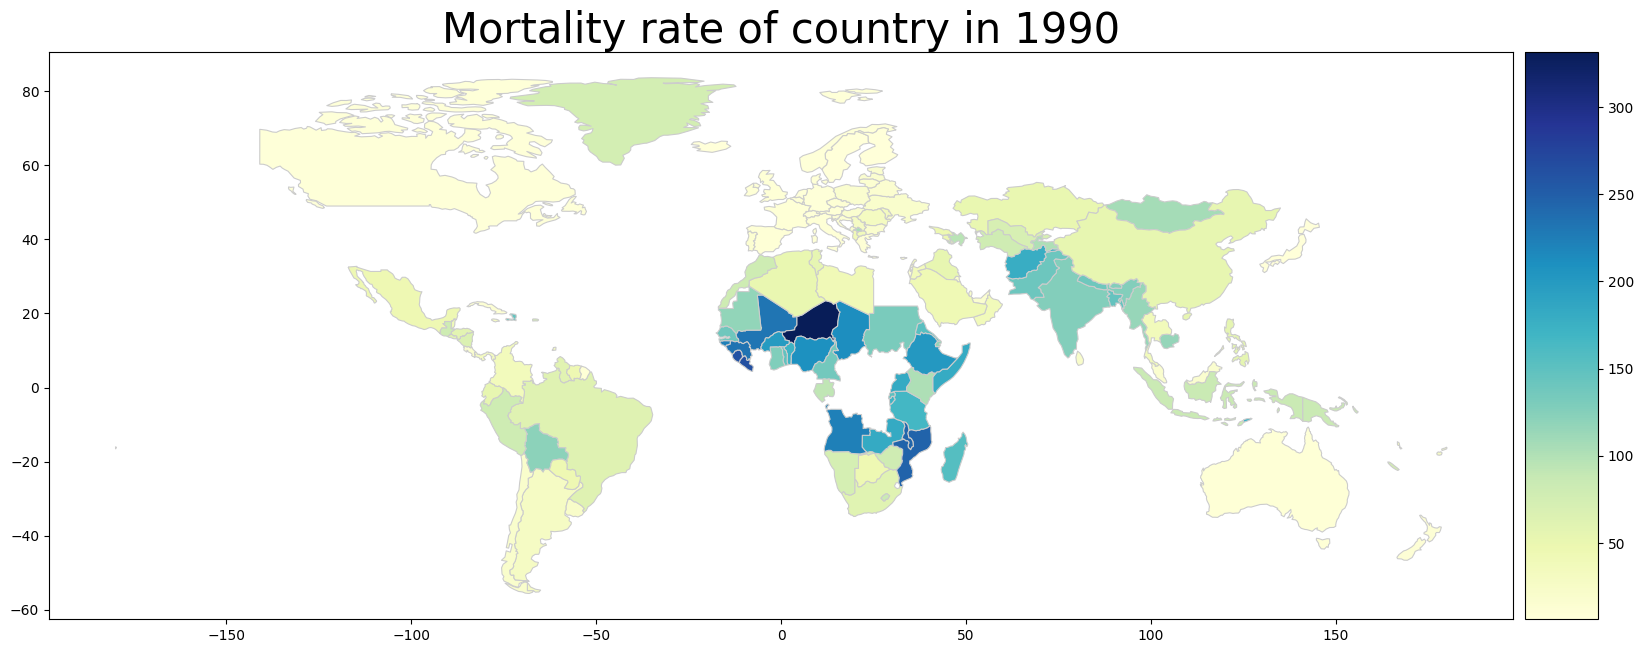

In [20]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged_data = world.merge(data_cleaned[['Country Name', '1990']], how='left', left_on='name', right_on='Country Name')

fig, ax = plt.subplots(1, 1, figsize=(20, 16))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

merged_data.plot(column='1990', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)
ax.set_title('Mortality rate of country in 1990', fontsize=30)
plt.savefig("1990.png")
plt.show()